# <center>GDP Analysis - Exploratory Data Analysis</center>
<center>By: Vikram Mathur</center>

#### Objective
As the chief data scientist at NITI Aayog, reporting to the CEO. The CEO has initiated a project wherein the NITI Aayog will provide top-level recommendations to the Chief Ministers (CMs) of various states which will help them prioritise areas of development for their respective states. Since different states are in different phases of development, the recommendations should be specific to states as well. 

The overall goal of this project is to help the CMs focus on areas which will foster economic development for their respective states. Since the most common measure of economic development is the GDP, analyse the GDP of the various states of India and suggest ways to improve it.


# Table Of Contents<br/>

[Setup Environment - Library Installation and Path Set](#SetupEnvironment)<br/><br/>
1. [Part 1A - GDP Analysis of Indian States](#PartI)<br/>
    1.1  [Part IA - Data Sourcing - Raw Data Load - Data IA](#I-DataLoad)<br/>
    1.2  [Part IA - Preparing Data for Analysis](#I-DataPrep)
    > 1.2.1 [Removing Rows for 2016-2017](#I-DataPrep-RowsnUT)<br/>
    1.2.2 [Handling Missing Data](#I-DataPrep-MissingVal)<br/>
    
    1.3  [Part IA - Data Modelling, Visualization & Interpretation](#I-DMV)<br/>
    > 1.3.1 [Average Growth of States - 2013-14,2014-15 and 2015-16](#I-AvgGrowth)<br/>
    1.3.2 [Average Growth Rate of Home State](#I-AvgGrowthHome)<br/>
    1.3.2 [Total GDP of States for year 2015-16](#I-TotalGDP15-16)<br/>
    
2. [Part 1B - GDP Analysis of Indian States](#PartII)<br/>
    2.1  [Part IB - Data Sourcing - Raw Data Load - Data IB (Don't load UTs)](#PartII-DataLoad)<br/>
    2.2  [Part IB - Preparing Data for Analysis](#PartII-DataPrep)<br/>
    2.3 [Part IB - Data Modelling, Visualization & Interpretation](#II-DMV)<br/>
    > 2.3.1 [GDP Per Capital for all States - Plot, Top/Bottom, Ratio](#II-GDPPerCapita)<br/>
    2.3.2 [Percentage contribution of Sectors as a Percentage of total GDP for all the states.](#II-SectorsTotalGDP)<br/>
    >> 2.3.2.1 [Birds Eye View](#II-BirdsEyeView)<br/>
    >> 2.3.2.1 [Detailed Analysis](#II-DetailedA)
    
    > 2.3.3 [State Categorization - C1, C2, C3 and C4](#II-Categorization)<br/>
    2.3.4 [Top 3/4/5 sub-sectors](#II-TopSubSectors)<br/>
    >> 2.3.4.1 [Determining, Fetching Sub-Sectors and Data Cleaning](#II-FetchSubSectors)<br/>
    2.3.4.2 [Handling Missing Data](#II-MissingData)<br/>
    2.3.4.3 [Compuring Total GDP for Categories](#II-CategoryGDP)

    > 2.3.5 [Contribution of the sub-sectors as a % of the GSDP of each category](#II-SubSectorPlot)<br/>
   2.3.6 [Analysis 1: Which Sub-Sub-Sector within the Sub-Sector, "Agriculture, forestry and fishing" has high percentage contribution?](#II-A1)<br/>
    2.3.7 [Two recommendations for each category to improve the per capita GDP](#II-Recommendations)<br/>
    2.3.8 [Analysis 2: Correlation of GSDP and GDP Per Capita and Population](#II-A2)<br/>
    
3. [Part 2 - GDP and Education Drop-out Rates](#Part2)<br/>
    3.1  [Part 2 - Data Raw Load - Data II](#Part2-DataLoad)<br/>
    3.2 [Part 2 - Data Preparation](#Part2-DataPrep)<br/>
    3.3 [Part 2 - Data Modelling, Visualization & Interpretation](#Part2-DMV)<br/>
    > 3.3.1 [Correlation of GDP per capita with dropout rates in education](#Part2-GDP_DropOut)<br/>
    >> 3.3.1.1 [Analysis 1: Plot & Correlate GDP Per Capita with Overall Education Drop-Out Rate](#Part2-A1)<br/>
    3.3.1.2 [Analysis 2: Plot & Correlate GDP Per Capita with Each Level of Education Drop-Out Rate](#Part2-A2)<br/>
    3.3.1.3 [Analysis 3: Plot & Correlate Category (C1, C2, C3, C3) with Overall and Each Level of Education Drop-Out Rate](#Part2-A3)<br/>
    3.3.1.4 [Analysis 4: Plot & Correlate States with Each Level of Education Drop-Out Rate](#Part2-A4)

    3.3.2 [Hypothesis](#Part2-Hypothesis)<br/> 

<a id="SetupEnvironment"></a>

# Setup Environment
Library Installation and Path Set

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os

#*************************************************************************************************************************
# Install squarify library for treemap algorithm.
# pip install squarify
#*************************************************************************************************************************
import squarify # pip install squarify

#*************************************************************************************************************************
# Change the local path of the folder here. 
# All input CSV files to be stored on this path and the files names should not change.
# EDIT THE FOLLOWING LINE AND PROVIDE LOCAL PATH
#*************************************************************************************************************************
os.chdir("C:/Users/madhumathur/Documents/UpGrad/Assignment/data")

<a id="PartI"></a>

# 1. Part IA - GDP Analysis of Indian States

<a id="I-DataLoad"></a>

### 1.1 Data Sourcing - Load Raw Data

In [2]:
#Reading the csv file
df_GSDP = pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv")
#df_GSDP

<a id="I-DataPrep"></a>

> ### 1.2 Preparing Data for Analysis
    >> #### 1.2.1 Removing Rows for 2016-17
    >> #### 1.2.2 Handling Missing Data

> Assumption: Based on the comments from TA in the discussion forum the UTs are to be considered for Data 1A

<a id="I-DataPrep-RowsnUT"></a>

In [3]:
#Removing rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df_GSDP.drop(df_GSDP[df_GSDP['Duration'] == '2016-17'].index, inplace=True)

#Commented the dropping of Union Territories because as per the TAs for 1A States and UTs have to be included.
#To make dataframe for states only, removing union territories from the dataframe.
#df_GSDP.drop(['Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry'], axis=1, inplace=True)

<a id="I-DataPrep-MissingVal"></a>

In [4]:
# To find the missing values - summing up the missing values (column-wise)
#round(100*(df_GSDP.isnull().sum()/len(df_GSDP.index)), 2)

<b>Inference: </b>
    1. The column West Bengal1 has 100% null values and hence needs to be dropped.
    2. The columns having 22.2% of null values can be imputed with the mean. 
    3. The mean calculation is to be done separately for % and value/amount GDP rows and can be perfomed while modelling data.
    
<b>IMPUTING</b> is handled before before modelling and visualizing the data in the next section.

In [5]:
#Remove Columns having "all" values as null (e.g. column name 'West Bengal1')
df_GSDP.dropna(how='all', axis=1, inplace=True)

<a id="I-DMV"></a>
<a id="I-AvgGrowth"></a>

> ### 1.3 Data Modelling and Visualization
    >> #### 1.3.1 Average Growth of States - 2013-14, 2014-15 and 2015-16

In [6]:
#fetch a subset of the dataframe for % data
df_GSDP_Percent = df_GSDP.loc[df_GSDP['Items  Description'] == "(% Growth over previous year)", :]

#Imputing the missing value in the following state with the mean.
df_GSDP_Percent = df_GSDP_Percent.fillna(df_GSDP_Percent.mean())

# summing up the missing values (column-wise)
#round(100*(df_GSDP_Percent.isnull().sum()/len(df_GSDP_Percent.index)), 2)

In [7]:
#fetch rows for 2013-14, 2014-15 and 2015-16
#compute the mean and create the series
series_GSDP_Percent = np.round(df_GSDP_Percent.query('Duration == ["2013-14","2014-15","2015-16"]').mean(axis='rows'),2)

#Taking value of All_India GDP in a variable for future reference
per_All_India_GDP = series_GSDP_Percent['All_India GDP']

#remove the column 'All_India GDP' in order to get state specific series
series_GSDP_Percent = series_GSDP_Percent.drop(labels=['All_India GDP'])

#sort the series in descending order
series_GSDP_Percent = series_GSDP_Percent.sort_values(ascending=False)

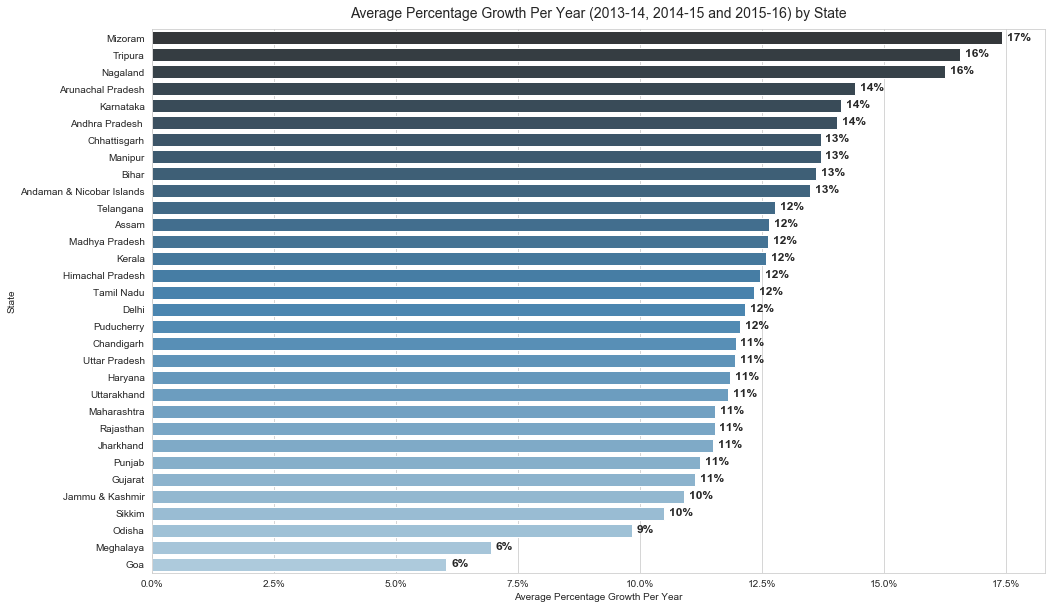

In [8]:
#plotting the average growth state wise in order for comparison 
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=series_GSDP_Percent.index, x=series_GSDP_Percent.values, palette=("Blues_d"))
plt.title("Average Percentage Growth Per Year (2013-14, 2014-15 and 2015-16) by State", size=14, y=1.01)
plt.xlabel("Average Percentage Growth Per Year")
plt.ylabel("State")
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+.54, str(int(i.get_width())) + "%",fontsize=12,fontweight='bold')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#### Data Interpretation
1. <b>North Eastern States</b> of <b>Mizoram, Tripura and Nagaland</b> depict the highest average growth percentage with over <b>16% growth</b>. They seem to have been consistently growing probably due to the developmental attention provided to these states. Their GDP value may not be highest but the growth trend is positive and is a good indication for North-East.<br/><br/>

2. States of <b>Goa, Meghalaya and Odisha</b> seem to be struggling. Their GDP was less than <b>10% growth</b> while all other states were over 10%. <br/><br/> 
3. An interesting observation is that while all the states of North-East have shown an upward trend of growth. The state of <b>Meghalaya</b> has struggled during this period and needs to be investigated.

<a id="I-AvgGrowthHome"></a>

#### 1.3.2 Average Growth Rate of Home State (Delhi)


In [9]:
#Home State - Delhi.
print("Average Percentage Growth for 2013-14, 2014-15 and 2015-16")
print("All India GDP:", per_All_India_GDP, "%")
print("Home State, Delhi's GDP:", series_GSDP_Percent['Delhi'], "%")
print ('\033[1m')
print("Average Percentage GDP Growth of Delhi is higher than the Average Percentage GDP Growth of India")
print ('\033[0m')

<a id="I-TotalGDP15-16"></a>

#### 1.3.3 Total GDP of the States for the year 2015-16

In [10]:
df_GSDP_15to16 = df_GSDP.loc[(df_GSDP['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)") & (df_GSDP['Duration'] == '2015-16'), :]

#Removing non required columns
df_GSDP_15to16 = df_GSDP_15to16.drop(['Items  Description', 'All_India GDP','Duration'], axis=1)

#Remove Columns having "all" values as null (e.g. column name 'West Bengal1')
df_GSDP_15to16 = df_GSDP_15to16.dropna(how='all', axis=1)

df_GSDP_15to16 = df_GSDP_15to16.transpose().reset_index()
df_GSDP_15to16.columns = ['State','TotalGDP']
df_GSDP_15to16 = df_GSDP_15to16.sort_values(by='TotalGDP', ascending=False)

Average Percentage Growth for 2013-14, 2014-15 and 2015-16
All India GDP: 11.2 %
Home State, Delhi's GDP: 12.16 %

Average Percentage GDP Growth of Delhi is higher than the Average Percentage GDP Growth of India



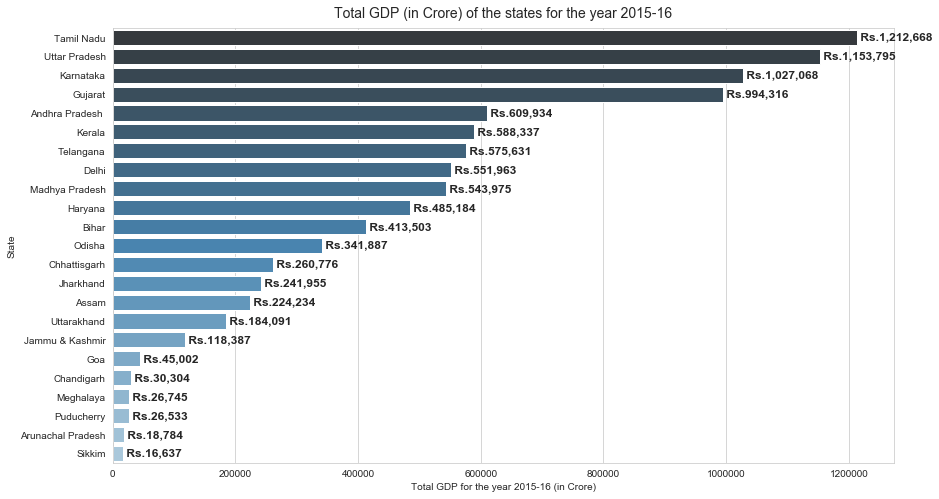

In [11]:
plt.figure(figsize=(14,8))
ax = sns.barplot(y='State', x='TotalGDP', data=df_GSDP_15to16, palette=("Blues_d"))
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+.54, ' Rs.' + str(format(int(i.get_width()),',')) ,fontsize=12,fontweight='bold')
plt.title("Total GDP (in Crore) of the states for the year 2015-16", size=14, y=1.01)
plt.xlabel("Total GDP for the year 2015-16 (in Crore)")
plt.ylabel("State")
#plt.xticks(rotation=45)

plt.show()

#### Data Interpretation

In [12]:
print ('\033[1m')
print("Top 5 States based on GDP for year 2015-16")
print ('\033[0m')
print(df_GSDP_15to16.iloc[:5,:].reset_index(drop=True))
print("\n")
print ('\033[1m')
print("Bottom 5 States based on GDP for year 2015-16")
print ('\033[0m')
print(df_GSDP_15to16.iloc[-5:,:].reset_index(drop=True))


Top 5 States based on GDP for year 2015-16

             State   TotalGDP
0       Tamil Nadu  1212668.0
1    Uttar Pradesh  1153795.0
2        Karnataka  1027068.0
3          Gujarat   994316.0
4  Andhra Pradesh    609934.0



Bottom 5 States based on GDP for year 2015-16

               State  TotalGDP
0         Chandigarh   30304.0
1          Meghalaya   26745.0
2         Puducherry   26533.0
3  Arunachal Pradesh   18784.0
4             Sikkim   16637.0


***

<a id="PartII"></a>

# 2. Part IB - GDP Analysis of Indian States

<a id="PartII-DataLoad"></a>

>  ### 2.1 Data Sourcing - Load Raw Data - Data IB

In [13]:
import glob
df_GSVA = pd.DataFrame()
df_GSVA['State'] = ""
for name in glob.glob('NAD*.csv'):
    df_GSVA = df_GSVA.append(pd.read_csv(name, encoding="ISO-8859-1"))
    str_State = name[name.rindex('NAD-')+4:name.rindex('-GSVA')].replace("_"," ")
    df_GSVA['State'].fillna(str_State, inplace = True)
    #print(name , u'\u2713')

C:\ds\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
#Removing Union Territories
UT = ["Delhi", "Puducherry", "Chandigarh","Andaman and Nicobar Islands","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep"]
df_GSVA = df_GSVA.query('State != @UT')

<a id="PartII-DataPrep"></a>

>  ### 2.2 Preparing Data for Analysis

In [15]:
df_GDP_PerCapita = df_GSVA.loc[df_GSVA['Item']=="Per Capita GSDP (Rs.)", ['State','2014-15']]
df_GDP_PerCapita = df_GDP_PerCapita.sort_values(by=['2014-15'], ascending = False)

<a id="II-DMV"></a>
<a id="II-GDPPerCapita"></a>

>  ### 2.3 Part IB - Data Modelling, Visualization & Interpretation
>>  ### 2.3.1 GDP per capita for all the states

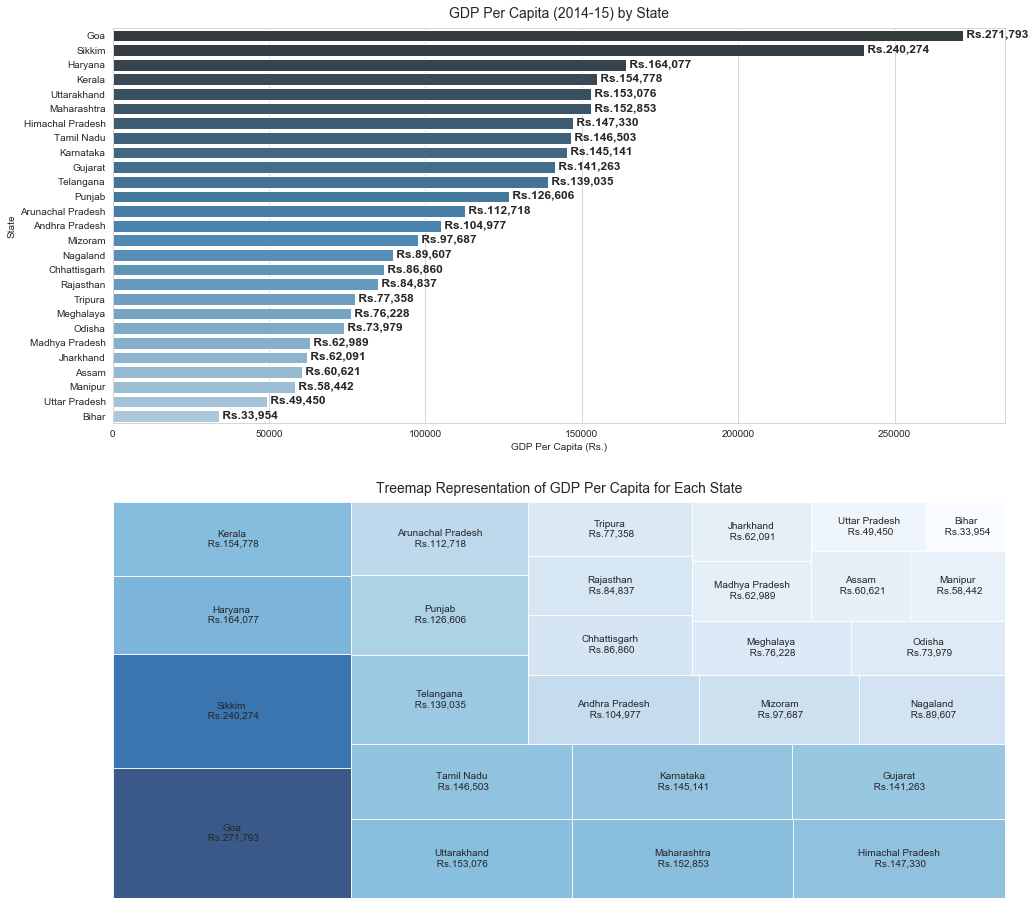

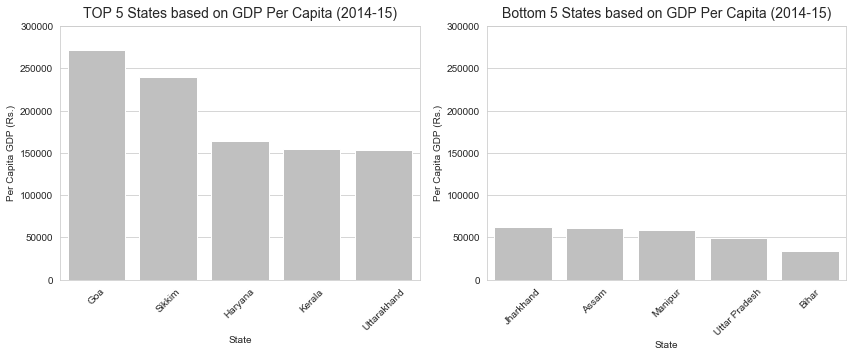

In [16]:
plt.figure(figsize=(16,16))
plt.figure(1)
plt.subplot(211)
sns.set_style("whitegrid")
ax = sns.barplot(y='State', x='2014-15', data=df_GDP_PerCapita, palette=("Blues_d"))
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+.54, ' Rs.' + str(format(int(i.get_width()),',')) ,fontsize=12,fontweight='bold')
plt.title("GDP Per Capita (2014-15) by State", size=14, y=1.01)
plt.xlabel("GDP Per Capita (Rs.)")

#Tree Map Distribution
#Creating second plot for ease of identifying the top and bottom states 
#and a coloured and size representation for ease of understanding
labels = df_GDP_PerCapita.apply(lambda x: str(x[0]) + "\n Rs." + str(format(int(x[1]),',')) + "", axis=1)
sizes = df_GDP_PerCapita['2014-15'].values.tolist()

#color setup
cmap = matplotlib.cm.Blues
mini=min(sizes)
maxi=max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]

plt.subplot(212)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title("Treemap Representation of GDP Per Capita for Each State", size=14, y=1.01)
plt.axis("off")

plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("TOP 5 States based on GDP Per Capita (2014-15)", size=14, y=1.01)
sns.barplot(x='State', y='2014-15', data=df_GDP_PerCapita.iloc[:5,:], color='silver')
plt.ylabel("Per Capita GDP (Rs.)")
plt.ylim((0,300000))
plt.tight_layout()
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title("Bottom 5 States based on GDP Per Capita (2014-15)", size=14, y=1.01)
sns.barplot(x='State', y='2014-15', data=df_GDP_PerCapita.iloc[-5:,:], color='silver')
plt.ylabel("Per Capita GDP (Rs.)")
plt.ylim((0,300000))
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

#### Top-5 and the Bottom-5 states based on GDP per capita
<b>Goa > Sikkim > > Haryana > Kerala > Uttarakhand</b>

<b>Bihar < Uttar Pradesh < Manipur < Assam < Jharkhand</b>

The data is an indication that the standard of living is the worst in Bihar whereas it's the best in Goa.

<a id="II-GDPPerCapita-Ratio"></a>

#### Ratio of highest per capita GDP to the lowest per capita GDP.

In [17]:
#First element from the sorted dataframe and the last element from the sorted dataframe
print ('\033[1m')
print('Ratio of highest per capita GDP to the lowest per capita GDP.\n')
print('Ratio:',int(np.round(df_GDP_PerCapita.iloc[0,1] / df_GDP_PerCapita.iloc[-1,1])),' : 1')
print ('\033[1m')


Ratio of highest per capita GDP to the lowest per capita GDP.

Ratio: 8  : 1



<a id="II-SectorsTotalGDP"></a>

### 2.3.2 Percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.
> 2.3.2.1 Data Modelling, Visualization & Recommendation - Birds Eye View<br/>
2.3.2.2 Data Modelling, Visualization & Recommendation - Detailed

In [18]:
#Create a new dataframe for State and Sector
#Filter rows having S.No. as total. These are Items: Primary, Secondary and teriary which are the sectors.
df_GSVA_State_Sectors = df_GSVA.loc[df_GSVA['S.No.'].str.lower()=='total',:]

#Drop redundant columns
df_GSVA_State_Sectors = df_GSVA_State_Sectors.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'], axis=1)

In [19]:
#Get the Total GDP of all States
df_GSDP_State_TotalGDP = df_GSVA.loc[df_GSVA['Item']=='Gross State Domestic Product',:]
df_GSDP_State_TotalGDP = df_GSDP_State_TotalGDP.loc[:,['State','2014-15']]

In [20]:
#Merge State, Sector and Total GDP dataframes into One.
df_GSVA_State_Sectors = df_GSVA_State_Sectors.merge(df_GSDP_State_TotalGDP, how='inner',on='State')

In [21]:
#Calculate Percentage Contribution - Derived Metrics
df_GSVA_State_Sectors['PerContribution'] = np.round((df_GSVA_State_Sectors['2014-15_x'] / df_GSVA_State_Sectors['2014-15_y'])*100,2)

In [22]:
#Preparing dataframe for a stacked bar chart
df_plot_State_Sector = df_GSVA_State_Sectors.set_index('State').loc[:,['Item','PerContribution']]
#df_plot.rename(index=str, columns={"Item": "Sectors"}, inplace=True)
df_plot_State_Sector = df_plot_State_Sector.pivot_table(values='PerContribution',columns='Item',index='State')

<a id="II-BirdsEyeView"></a>

#### 2.3.2.1 Data Visualization (Birds Eye View)

<Figure size 432x288 with 0 Axes>

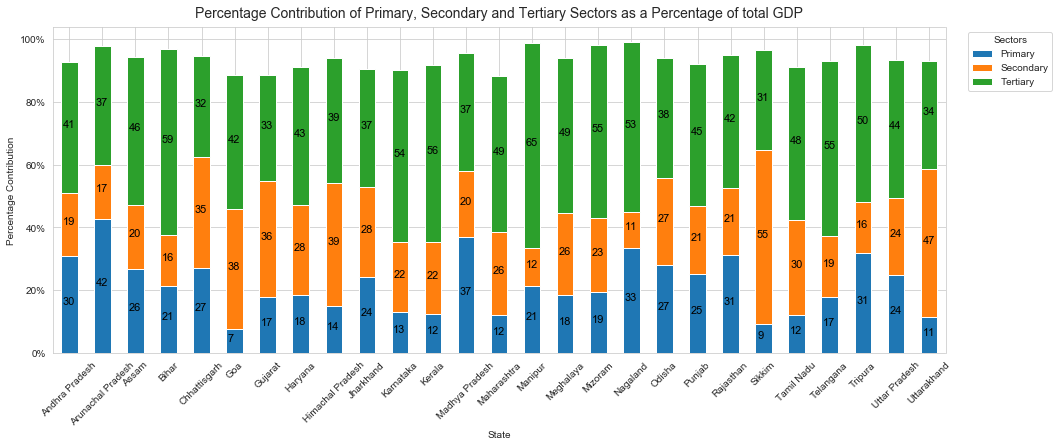

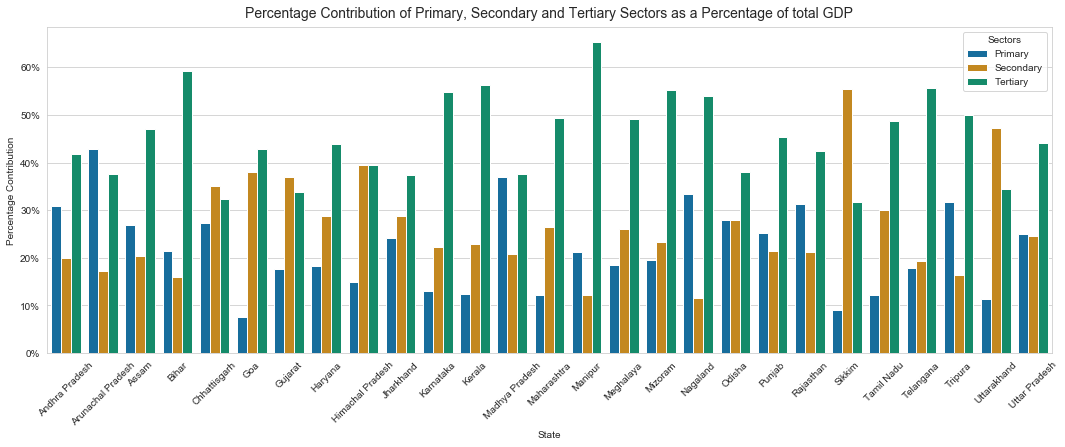

In [23]:
#HIGH LEVEL Data Plots for Overview
#Creating 2 plots for ease of data derivation

plt.figure(1)
ax = df_plot_State_Sector.plot(kind='bar',stacked=True)
plt.title("Percentage Contribution of Primary, Secondary and Tertiary Sectors as a Percentage of total GDP", size=14, y=1.01)
plt.xlabel("State")
plt.ylabel("Percentage Contribution")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
fig = plt.gcf()
fig.set_size_inches(16,6, forward = False)
plt.legend(title="Sectors", bbox_to_anchor=(1.02, 1), loc=2)
for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_y() + i.get_height()/2., str(int(i.get_height())), fontsize=11, color='black')
plt.show()

#Creating second plot for ease of identifying the top and bottom values of the sector
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
sns.barplot(y='PerContribution', x='State', hue='Item', data=df_GSVA_State_Sectors, palette=("colorblind"))
plt.title("Percentage Contribution of Primary, Secondary and Tertiary Sectors as a Percentage of total GDP", size=14, y=1.01)
plt.xlabel("State")
plt.ylabel("Percentage Contribution")
plt.xticks(rotation=45)
plt.legend(title="Sectors")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#### Data Interpretation (Birds Eye View)

Based on the data India seems to be on the fast pace towards becoming a Developed Economy. This is evident as:-
- The Percentage Contribution in the Tertiary Sector is higher than the Primary and Secondary Sector
- The above is followed by Secondary Sector which is followed by Primary Sector

Sector to State mapping for the <b>highest percentage contribution</b> based on the State's Total GDP.
1. <b>Primary Sector - Arunachal Pradesh followed by Madhya Pradesh</b>
2. <b>Secondary Sector - Uttarakhand followed by Himachal Pradesh</b>
3. <b>Tertiary Sector - Manipur followed by Bihar</b>

<a id="II-DetailedA"></a>

#### 2.3.2.2 Detailed Visualization For Each Sector by State for better Inference
With the plots above we can only visualize the Top Sectors but it is a cluttered plot to understand details about each sector. Creating Treemaps for understanding details for each Sector and their performance in each State.

In [24]:
# Creating separate dataframes for each Sector
df_map_Sector_Primary = df_GSVA_State_Sectors.query('Item == "Primary"').loc[:,['State','PerContribution']]
df_map_Sector_Primary = df_map_Sector_Primary.sort_values(by='PerContribution', ascending=False)

df_map_Sector_Secondary = df_GSVA_State_Sectors.query('Item == "Secondary"').loc[:,['State','PerContribution']]
df_map_Sector_Secondary = df_map_Sector_Secondary.sort_values(by='PerContribution', ascending=False)

df_map_Sector_Tertiary = df_GSVA_State_Sectors.query('Item == "Tertiary"').loc[:,['State','PerContribution']]
df_map_Sector_Tertiary = df_map_Sector_Tertiary.sort_values(by='PerContribution', ascending=False)

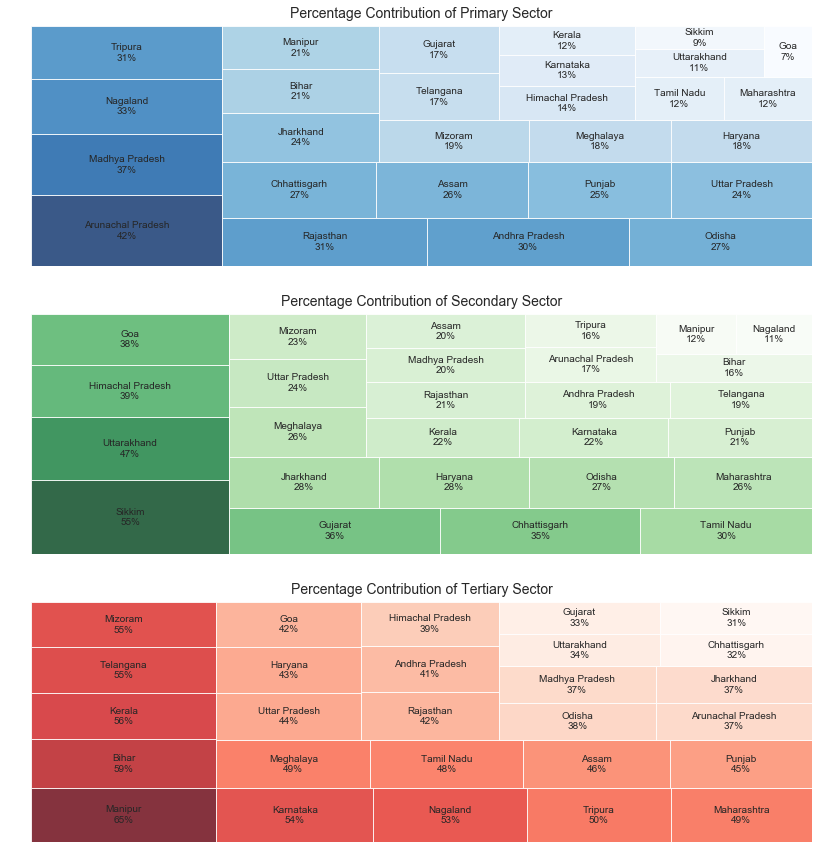

In [25]:
#Creating three separate treemaps for sector visualization
plt.figure(figsize=(14,15))

#Primary Sector
plt.subplot(311)
labels = df_map_Sector_Primary.apply(lambda x: str(x[0]) + "\n" + str(int(x[1])) + "%", axis=1)
sizes = df_map_Sector_Primary['PerContribution'].values.tolist()
#color setup
cmap = matplotlib.cm.Blues
mini=min(sizes)
maxi=max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title("Percentage Contribution of Primary Sector", size=14, y=1.01)
plt.axis("off")

#Secondary Sector
plt.subplot(312)
labels = df_map_Sector_Secondary.apply(lambda x: str(x[0]) + "\n" + str(int(x[1])) + "%", axis=1)
sizes = df_map_Sector_Secondary['PerContribution'].values.tolist()
#color setup
cmap = matplotlib.cm.Greens
mini=min(sizes)
maxi=max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title("Percentage Contribution of Secondary Sector", size=14, y=1.01)
plt.axis("off")

#Tertiary Sector
plt.subplot(313)
labels = df_map_Sector_Tertiary.apply(lambda x: str(x[0]) + "\n" + str(int(x[1])) + "%", axis=1)
sizes = df_map_Sector_Tertiary['PerContribution'].values.tolist()
#color setup
cmap = matplotlib.cm.Reds
mini=min(sizes)
maxi=max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title("Percentage Contribution of Tertiary Sector", size=14, y=1.01)
plt.axis("off")

plt.show()

#### Data Interpretation (Key Insights) & Recommendations

<b>Percentage Contribution is highest for the Tertiary Sector, then Secondary Sector and then Primary Sector. This signifies India's progress towards a Developed economy where the Tertiary Sector involved with the service industry and Secondary sector involved with machinery has higher percentage contribution and higher skilled labour in comparison to Primary sector.</b>

1. <b>Sikkim has highest Secondary Sector Contribution but lowest Primary and Tertiary Sector Contribution</b><br/>
    - This suggests the state is highly dependent on Secondary Sectors for it's GDP growth.
    - Focus on Primary and Tertiary Sectors will help improve GDP
<br/><br/>
2. <b>Goa (having highest GDP Per Capita in 2014-15) has lowest Primary Sector Contribution but does well in the Secondary and Tertiary Sectors</b><br/>
    - This suggests the state is highly dependent on Secondary and Tertiary Sectors for it's GDP growth. 
    - Focus on Primary Sector can help increase the overall GDP further.
        - The Sub Sub Sector of <b>"Fishing and aquaculture"</b> can potentially be given more importance to improve Primary Sector contribution for better GDP
<br/><br/>
2. <b>Bihar (having lowest GDP Per Capita in 2014-15) has low Primary and Secondary Sector Contribution but does well in the Tertiary Sectors</b><br/>
    - This suggests the state is highly dependent on Tertiary Sectors for it's GDP growth. 
    - The <b>Standard of living of people can improve</b> if the focus on Primary and Secondary sectors like "Agriculture, forestry and fishing" and "Manufacturing" is improved.

<a id="II-Categorization"></a>

### 2.2.3 Categorization based on GDP per capita (C1, C2, C3, C4)
C1 would have the highest per capita GPD, C4 the lowest. The quantile values are (0.20,0.5, 0.85, 1)

In [26]:
length = len(df_GDP_PerCapita['2014-15'])

#20th percentile (row selection: 1 - 0.2 = 0.8)
Quantile_1 = int(np.floor(0.80 * length)) - 1
#50th percentile
Quantile_2 = int(np.floor(0.50 * length)) - 1
#85th percentile (row selection: 1 - 0.85 = 0.15)
Quantile_3 = int(np.floor(0.15 * length)) - 1
#print('0 to',Quantile_3,' then ', Quantile_3+1,'to',Quantile_2, ' then ', Quantile_2+1, 'to', Quantile_1, 'then', Quantile_1+1, 'to',length-1)

df_GDP_PerCapita = df_GDP_PerCapita.reset_index(drop=True)
#Set Categories
df_GDP_PerCapita.loc[0:Quantile_3, 'Category'] = 'C1'
df_GDP_PerCapita.loc[Quantile_3+1:Quantile_2,'Category'] = 'C2'
df_GDP_PerCapita.loc[Quantile_2+1:Quantile_1, 'Category'] = 'C3'
df_GDP_PerCapita.loc[Quantile_1+1:length-1, 'Category'] = 'C4'
df_Category_State = df_GDP_PerCapita.drop('2014-15',axis=1)

def category_highlight(x):
    df = x.copy()
    mask = df['Category'] == "C1"
    df.loc[df['Category'] == "C1", :] = 'background-color: lightblue'
    mask = df['Category'] == "C2"
    df.loc[mask, :] = 'background-color: lightgreen'
    mask = df['Category'] == "C3"
    df.loc[mask, :] = 'background-color: khaki'
    mask = df['Category'] == "C4"
    df.loc[mask, :] = 'background-color: lightsalmon'
    return df    

df_GDP_PerCapita.style.apply(category_highlight, axis=None)

,State,2014-15,Category
0,Goa,271793,C1
1,Sikkim,240274,C1
2,Haryana,164077,C1
3,Kerala,154778,C1
4,Uttarakhand,153076,C2
5,Maharashtra,152853,C2
6,Himachal Pradesh,147330,C2
7,Tamil Nadu,146503,C2
8,Karnataka,145141,C2
9,Gujarat,141263,C2


<a id="II-TopSubSectors"></a>

### 2.3.4 Top 3/4/5 sub-sectors
Contributing to approx. 80% of the GSDP of each category

<a id="II-FetchSubSectors"></a>

#### 2.3.4.1 Determining and Fetching Sub-Sectors and Data Cleaning

In [27]:
#Creating Dataframe to get all sub-sectors

#Checking S.No. and Item and grouping them to understand what constitutes Totals, Sectors and Subsectors
df_GSVA.groupby(['S.No.','Item']).size()
#print(df_GSVA.groupby(['S.No.','Item']).size())

#S.No. 1 to 11 have got all the subsectors, S.No. 12 to 17 are totals and S.No. Total is for Sectors
#. S.No. 1.1, 7.1 etc are all sub-sub sectors within the subsectors

# Correction Needed: S.No. having trailing "." need to be corrected
df_GSVA['S.No.'] = df_GSVA['S.No.'].str.rstrip().str.rstrip('.')

#Getting S.No. 1 to 11 as the sub-Sectors
df_SubSectors = df_GSVA[df_GSVA['S.No.'].isin(['1','2','3','4','5','6','7','8','9','10','11'])]

#Selecting data for 2014-15 for analysis
df_SubSectors = df_SubSectors.loc[:,['State','Item','2014-15']].reset_index(drop=True)

<a id="II-MissingData"></a>

#### 2.3.4.2 Handling Missing Data

In [28]:
#df_SubSectors.info()

#Info gives the indication that 1 null value is present in column 2014-15.
#Determining the row missing
df_SubSectors[np.isnan(df_SubSectors['2014-15'])]

#The value of the Sub-Sector "Mining and qurraying" is NaN. It is for the state of Manipur.
#It can be calculated as GDP for Primary Sector - GDP for Agriculture, forestry and fishing
#print(df_SubSectors.query('Item == "Agriculture, forestry and fishing" & State == "Manipur"'))
#print(df_GSVA.query('Item == "Primary" & State =="Manipur"'))

#The Value of Mining and Qurraying will be 0.
df_SubSectors.loc[np.isnan(df_SubSectors['2014-15']), '2014-15'] = 0

#Rechecking for missing values
#round(100*(df_SubSectors.isnull().sum()/len(df_SubSectors.index)), 2)

In [29]:
# Mapping the Sub Sector to the Categories together in one dataframe. Merging based on state
df_SubSector_Category = df_SubSectors.merge(df_Category_State, how="inner", on="State")

#Group by the Category and Sub Sector. Sum up the 2014-15 GDP for each.
df_SubSector_Category = df_SubSector_Category.groupby(['Category','Item'])[['2014-15']].sum()
df_SubSector_Category.reset_index(inplace=True)

<a id="II-CategoryGDP"></a>

#### 2.3.4.3 Computing the GDP for Categories
Assumption: Taking the value of "Gross State Domestic Product" and not "Total GSVA at Basic Price" based on TA's verification on the discussion forum

In [30]:
#Filtering rows for Total GSVA at basic price for the year 2014-15
df_GSDP_State = df_GSVA.loc[df_GSVA['Item'] == 'Gross State Domestic Product',['State','2014-15']]

#Check dataframe for number of rows.
#df_GSDP_State.info()

#Merging dataframe to map with categories
df_GSDP = df_GSDP_State.merge(df_Category_State,how="inner",on="State")

#Computing the sum based on Categories - C1, C2, C3 and C4
df_Category_GDP = df_GSDP.groupby('Category')[['2014-15']].sum()
df_Category_GDP.reset_index(inplace=True)
#df_Category_GDP

In [31]:
# Merging Category GDP and Subsector GDP dataframes to compute the percentage contribution of each Sub sector.
df_SubSector_CategoryGDP = df_SubSector_Category.merge(df_Category_GDP, how="inner", on="Category")

In [32]:
#Rounding off to 0 decimal place - Derived Metrics
df_SubSector_CategoryGDP['PerContribution'] = np.round((df_SubSector_CategoryGDP['2014-15_x'] / df_SubSector_CategoryGDP['2014-15_y'])*100,0)

In [33]:
df_SubSector_CategoryGDP = df_SubSector_CategoryGDP.loc[:,['Category','Item','PerContribution']]

#Derived Metrics
df_SubSector_CategoryGDP.sort_values(['Category','PerContribution'],ascending=[True, False],inplace=True)
df_SubSector_CategoryGDP.reset_index(drop=True,inplace=True)

In [34]:
#Top 6 sub sector contribute to approximate 80% of Sub Sector's Percentage Contribution under each category
df_SubSector_CategoryGDP_Top6 = df_SubSector_CategoryGDP.groupby(['Category']).head(6)
df_SubSector_CategoryGDP_Top6 = df_SubSector_CategoryGDP_Top6.rename(columns={"Item": "SubSector"})
df_SubSector_CategoryGDP_Top6.style.apply(category_highlight, axis=None)

,Category,SubSector,PerContribution
0,C1,"Agriculture, forestry and fishing",14
1,C1,"Real estate, ownership of dwelling & professional services",14
2,C1,"Trade, repair, hotels and restaurants",14
3,C1,Manufacturing,13
4,C1,Construction,11
5,C1,Other services,8
11,C2,Manufacturing,19
12,C2,"Real estate, ownership of dwelling & professional services",16
13,C2,"Agriculture, forestry and fishing",13
14,C2,"Trade, repair, hotels and restaurants",10


<Figure size 1152x720 with 0 Axes>

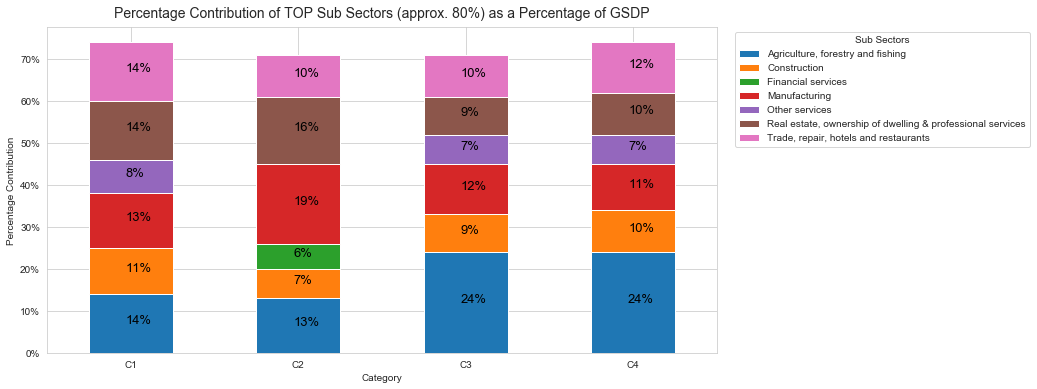

In [35]:
#Plotting the data for ease of analysis
df_plt = df_SubSector_CategoryGDP_Top6.pivot_table(values='PerContribution',columns='SubSector',index='Category')

plt.figure(figsize=[16,10])
ax = df_plt.plot(kind='bar',stacked=True)
for i in ax.patches:
    if (i.get_height() != 0):
        ax.text(i.get_x()+0.22, i.get_y() + i.get_height()/2., str(int(i.get_height())) + "%", fontsize=13, color='black')

plt.title("Percentage Contribution of TOP Sub Sectors (approx. 80%) as a Percentage of GSDP", size=14, y=1.01)
plt.xlabel("Category")
plt.ylabel("Percentage Contribution")
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
fig = plt.gcf()
fig.set_size_inches(12,6, forward = False)
plt.legend(title="Sub Sectors", bbox_to_anchor=(1.02, 1), loc=2)

plt.show()

<a id="II-SubSectorPlot"></a>

<b>Data Interpretation & Key Insight</b>

<i>Common Top Sub-Sectors (approx. 80%) in Each Category (C1, C2, C3 and C4) are:-</i><br/>
- Agriculture, forestry and fishing<br/>
- Real estate, ownership of dwelling & professional services<br/>
- Trade, repair, hotels and restaurants<br/>
- Manufacturing<br/>
- Construction<br/>

### 2.3.5 Plot Contribution of the sub-sectors as a Percentage of the GSDP of each category

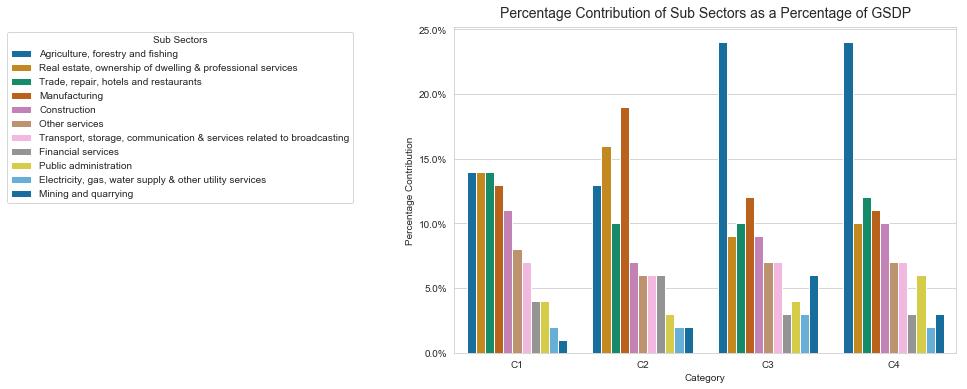

In [36]:
#Plot all sub-sectors against Categories in a bar plot
plt.figure(figsize=[9,6])
sns.set_style("whitegrid")
sns.barplot(y='PerContribution', x='Category', hue='Item', data=df_SubSector_CategoryGDP, palette='colorblind')
plt.title("Percentage Contribution of Sub Sectors as a Percentage of GSDP", size=14, y=1.01)
plt.xlabel("Category")
plt.ylabel("Percentage Contribution")
plt.legend(title="Sub Sectors", bbox_to_anchor=(-0.9, 1), loc=2)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

<b>Data Interpretation / Key Insights</b><br/>
Category Wise Top Contributing and Lowest Contributing Sub Sectors
- Category C1, C2, C3 and C4 wise commonalities
    - Top 5: <b> The sub-sectors which seem to be correlated with high GDP</b>
        - Agriculture, forestry and fishing
        - Real estate, ownership of dwelling & professional services
        - Trade, repair, hotels and restaurants
        - Manufacturing 
        - Construction
    - Bottom 4: <b>The Sub-Sectors which various categories need to focus on</b>
        - Mining and quarrying
        - Electricity, gas, water supply & other utility services
        - Public Administration
        - Financial Services<br/>
The above Sub-Sectors contribute less than 4% each in terms of GDP quotient of a Category
<br/><br/>
- <b>Categories C3 and C4 seem to be highly dependent on "Agriculture, forestry and fishing" Sector.</b>
- <b>Category C1 has almost equal percentage contribution in the top 5 sectors.</b> This signifies equal focus on development across top performing Sectors.
- Similar to Category C1, the category C2 seems consistent in the percentage contribution by the top 5 sectors.

<a id="II-A1"></a>

### 2.3.6 Analysis 1: Which Sub-Sub-Sector within the Sub-Sector, "Agriculture, forestry and fishing" has high percentage contribution

The Sector Sub-Sector has been the major percentage contributor to the categories. It would be interesting to find out the percentage contribution for it's Sub-Sub-Sectors to understand if there are major influencers.


In [37]:
df_SubSubSectors_S1 = df_GSVA[df_GSVA['S.No.'].isin(['1','1.1','1.2','1.3','1.4'])]

#Selecting data for 2014-15 for analysis
df_SubSubSectors_S1 = df_SubSubSectors_S1.loc[:,['State','Item','2014-15']].reset_index(drop=True)

df_SubSubSectors_S1 = df_SubSubSectors_S1.merge(df_Category_State, how='inner', on='State')
df_SubSubSectors_S1 = df_SubSubSectors_S1.drop(['State'],axis=1)
df_SubSubSectors_S1 = pd.pivot_table(df_SubSubSectors_S1, index='Category',columns='Item',values='2014-15')
df_SubSubSectors_S1['Crops'] = 100*np.round(df_SubSubSectors_S1['Crops'] / df_SubSubSectors_S1['Agriculture, forestry and fishing'],2)
df_SubSubSectors_S1['Fishing and aquaculture'] = 100*np.round(df_SubSubSectors_S1['Fishing and aquaculture'] / df_SubSubSectors_S1['Agriculture, forestry and fishing'],2)
df_SubSubSectors_S1['Forestry and logging'] = 100*np.round(df_SubSubSectors_S1['Forestry and logging'] / df_SubSubSectors_S1['Agriculture, forestry and fishing'],2)
df_SubSubSectors_S1['Livestock'] = 100*np.round(df_SubSubSectors_S1['Livestock'] / df_SubSubSectors_S1['Agriculture, forestry and fishing'],2)
df_SubSubSectors_S1 = df_SubSubSectors_S1.drop('Agriculture, forestry and fishing',axis=1)

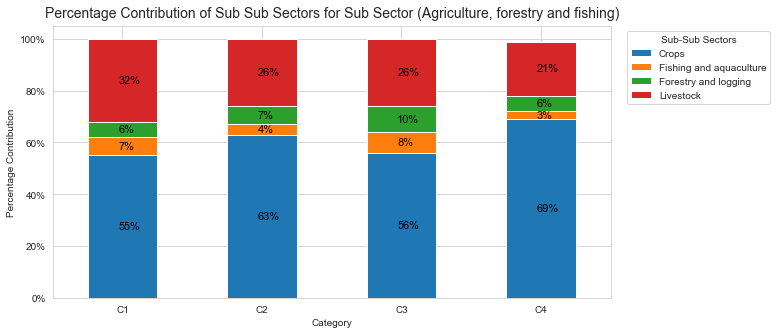

In [38]:
ax = df_SubSubSectors_S1.plot(kind='bar',stacked=True)
for i in ax.patches:
    if (i.get_height() != 0):
        ax.text(i.get_x()+0.22, i.get_y()-1 + i.get_height()/2., str(int(i.get_height())) + "%", fontsize=11, color='black')

plt.title("Percentage Contribution of Sub Sub Sectors for Sub Sector (Agriculture, forestry and fishing)", size=14, y=1.01)
plt.xlabel("Category")
plt.ylabel("Percentage Contribution")
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
fig = plt.gcf()
fig.set_size_inches(10,5, forward = False)
plt.legend(title="Sub-Sub Sectors", bbox_to_anchor=(1.02, 1), loc=2)

plt.show()

#### Data Interpretation & Key Insights

<b>Sub Sub Sector, Crops contributes to about 61%</b><br/>
<b>Sub Sub Sector, Livestock contributes to about 26%</b>

- The above Sub-Sub Sectors are the dominant influencers within the "Agriculture, forestry and fishing" Sector. 
- Also, there is no variance between Categories in terms of variations in Sub-Sub Sectors contribution

<a id="II-Recommendations"></a>

### 2.3.7 Two recommendations for each category to improve the per capita GDP

- Category C1
    - Focus on the low contributing Sub Sectors - "Mining & Quarrying (1%)", "Electricity, gas, water supply & other utility services (2%)", "Public Administration (4%)" and "Financial Services (4%)". Development of <b>skills through education</b>, <b>funds</b>, <b>subsidies</b> and <b>schemes</b> to support growth of these Sub-Sectors.
    - To ensure sustained GDP growth in the Top 3 Sub-Sectors - "Agriculture, forestry and fishing (14%)", "Real estate, ownership of dwelling & professional services (14%)" and "Trade, repair, hotels and restaurants 	(14%)", beneficial <b>funds and schemes</b> should be launched by the government.
<br/><br/>
- Category C2
    - Focus on <b>development of Infrastructure</b> that would lead to increase in Construction Sub-Sector (7%) and other Tertiary Sectors.
    - Focus on the low contributing Sub Sectors - "Mining & Quarrying (2%)", "Electricity, gas, water supply & other utility services (2%)" and "Public Administration (3%)". Development of <b>skills through education</b>, <b>funds</b>, <b>subsidies</b> and <b>schemes</b> to support growth of these Sub-Sectors.
<br/><br/>
- Category C3
    - The Category is highly dependent on Primary Sector with "Agriculture, forestry and fishing" Sub-Sector contributing to 24% contribution. In order for further development of these states to move towards Manufacturing, Automation and eventually services industry will be the key to move them to Developed States. <b>Attractive and flexible business policies to attract industrial development and investments.</b>
    - Focus on the low contributing Sub Sectors - "Financial Services (3%)", "Electricity, gas, water supply & other utility services (3%)" and "Public Administration (4%)". Development of <b>skills through education</b>, <b>funds</b>, <b>subsidies</b> and <b>schemes</b> to support growth of these Sub-Sectors.
<br/><br/>
- Category C4
    - Focus on upcoming / mid contributing Sub Sectors - "Transport, storage, communication & services related to broadcasting (7%)" and "Other Services (7%)" by increasing it's budget.
    - <b>Increase Investment Climate Index to attached investments in Secondary and Tertiary Sectors.</b> The Category is currently highly dependent on Primary Sector with "Agriculture, forestry and fishing" Sub-Sector contributing to 24% contribution.





<a id="II-A2"></a>

### 2.3.8 Analysis 2: Correlation of GSDP and GDP Per Capita and Population

Finding the correlation of GSDP with the Per Capita GDP and Population

In [39]:
#Merging the GSDP and GDP Per Capita dataframes
df_GSDP_GDPperCapita = df_GDP_PerCapita.merge(df_GSDP_State_TotalGDP, how='inner', on='State')
df_Population = df_GSVA.loc[df_GSVA['S.No.']=='16',['State','2014-15']]
df_GSDP_GDPperCapita = df_GSDP_GDPperCapita.merge(df_Population, how='inner', on='State')
df_GSDP_GDPperCapita = df_GSDP_GDPperCapita.rename(columns={'2014-15':'Population','2014-15_x':'GDP_PerCapita','2014-15_y':'GSDP'})
df_GSDP_GDPperCapita = df_GSDP_GDPperCapita.sort_values(by='GSDP',ascending=False)

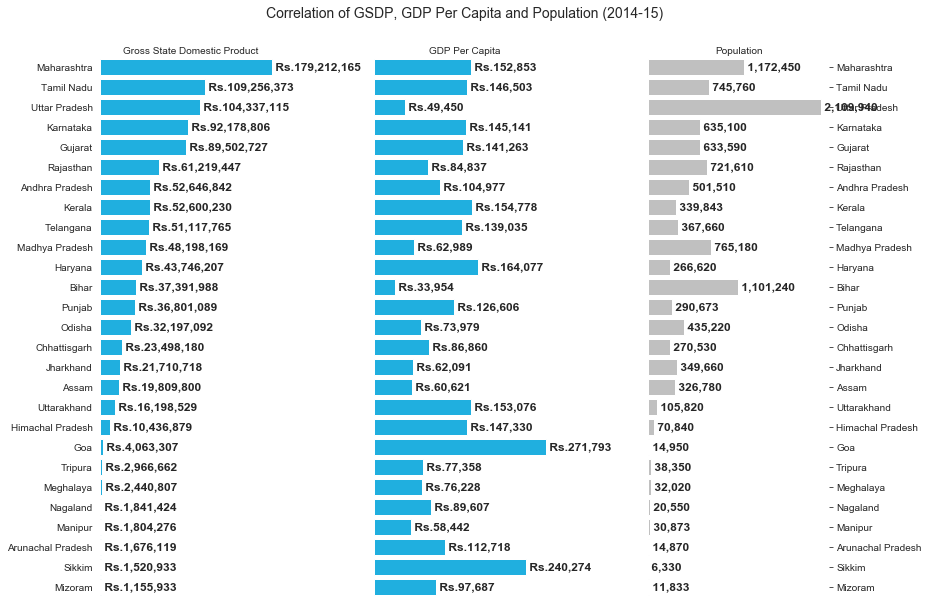

In [40]:
plt.figure(figsize=(13,8))
plt.suptitle("Correlation of GSDP, GDP Per Capita and Population (2014-15)",fontsize=14, y=1.05)
plt.subplot(131)
plt.box(on=None)
ax = sns.barplot(x='GSDP', y='State', data=df_GSDP_GDPperCapita, color='deepskyblue')
ax.set_xlabel('Gross State Domestic Product')
ax.xaxis.set_label_position("top")
ax.set_ylabel('')
ax.axes.get_xaxis().set_ticks([])
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.52,' Rs.' + str(format(int(i.get_width()),',')),fontsize=12,fontweight='bold')
ax.set_axisbelow(True)
ax.grid(False)
#ax.get_xaxis().get_major_formatter().set_scientific(False)

plt.subplot(132)
plt.box(on=None)
ax1 = sns.barplot(x='GDP_PerCapita', y='State', data=df_GSDP_GDPperCapita, color='deepskyblue')
ax1.set_xlabel('GDP Per Capita')
ax1.xaxis.set_label_position("top")
ax1.set_ylabel('')
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
for i in ax1.patches:
    ax1.text(i.get_width()+3, i.get_y()+.52 ,' Rs.' + str(format(int(i.get_width()),',')),fontsize=12,fontweight='bold')
ax1.set_axisbelow(True)
ax1.grid(False)

plt.subplot(133)
plt.box(on=None)
ax2 = sns.barplot(x='Population', y='State', data=df_GSDP_GDPperCapita, color='silver')
ax2.set_xlabel('Population')
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.axes.get_xaxis().set_ticks([])
ax2.set_ylabel('')
for i in ax2.patches:
    ax2.text(i.get_width()+3, i.get_y()+.52,' ' + str(format(int(i.get_width()),',')),fontsize=12,fontweight='bold')
ax2.set_axisbelow(True)
ax2.grid(False)

plt.tight_layout()
plt.show()

<b>Data Interpretation</b>
- Population of Bihar and Uttar Pradesh is very high. Their low GDP Per Capita makes them the poorest states in the country having <b>GDP per Capita less than Rs. 50,000</b>
- Maharashtra having high Population and done well in terms of their GDP growth and hence high GDP Per Capita

<a id="Part2"></a>

# 3. Part 2 - GDP and Education Drop-out Rates

<a id="Part2-DataLoad"></a>
<a id="Part2-DataPrep"></a>

>  ### 3.1 Data Raw Load - Data II
>  ### 3.2 Part 2 - Data Preparation
Assumption: 
1. Duplicate Column names. As per the TA (ref. Discussion Forum) taking the 2nd column "Primary - 2014-2015" and not 3rd.
2. Level of Eduction - Senior Secondary is to be ignored for the analysis

In [41]:
#Loading drop-out rate dataset
df_DropOut = pd.read_csv("rs_session243_au570_1.1.csv")

#Select data for 2014-15
#Duplication Column names. As per the TA (ref. Discussion Forum) taking the 2nd column "Primary - 2014-2015"
df_DropOut = df_DropOut.loc[:,['Level of Education - State','Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]

#Giving easy and meaningful column names
df_DropOut.rename(columns={'Level of Education - State':'State','Primary - 2014-2015':'Primary','Upper Primary - 2014-2015':'Upper Primary','Secondary - 2014-2015':'Secondary'}, inplace=True)

<b>Handling Missing Data in Drop Outs</b>

The NaN are not being dropped or imputed. Reasons:-
1. Row will not Dropped as the data will be plotted in a Scatter plot and/or Heat Map. Information about even one Level of Education provides some visibility.
2. Not imputed as mean() value is has a big range as there is a high variance and in other cases there are NaN values.

<b>Data Cleaning - Handling State Names Mismatch</b>

State mismatch in the Drop Out Dataframe and GDP Dataframe for 2 states.

In [42]:
df_DropOut.loc[df_DropOut['State']=='Chhatisgarh','State'] = 'Chhattisgarh'
df_DropOut.loc[df_DropOut['State']=='Uttrakhand','State'] = 'Uttarakhand'

<a id="Part2-DMV"></a>

### 3.3 Data Modelling, Visualization & Interpretation
> #### 3.3.1 Correlation of GDP per capita with dropout rates in education
>> 3.3.1.1 Analysis 1: Plot & Correlate GDP Per Capita with Overall Education Drop-Out Rate<br/>
3.3.1.2 Analysis 2: Plot & Correlate GDP Per Capita with Each Level of Education Drop-Out Rate<br/>
3.3.1.3 Analysis 3: Plot & Correlate Category (C1, C2, C3, C3) with Overall and Each Level of Education Drop-Out Rate<br/>
3.3.1.4 Analysis 4: Plot & Correlate States with Each Level of Education Drop-Out Rate<br/>

In [43]:
#Merge GSVA PerCapita dataframe with Drop Out dataframe based on States
df_State_DropOut_PerCapita = df_GDP_PerCapita.merge(df_DropOut,how='inner',on='State')

# There is no need to remove the NaNs from this dataframe. 
# While plotting the scatter plot the plot will automatically ignore the NaNs.
# While plotting heat maps of state it will not show it's value and will ignore.
#It is important to capture details about even one level of education for a state and it should not be ignored.

<a id="Part2-A1"></a>

##### 3.3.1.1 Analysis 1: Plot & Correlate GDP Per Capita with Overall Education Drop-Out Rate

In [44]:
#Form a dataframe for only GDP and Levels of Education

#Drop additional columns for the dataframe
df_GDP_DropOut = df_State_DropOut_PerCapita.drop(['State','Category'],axis=1)

#Single value Column for all Levels of Education
df_GDP_DropOut = pd.melt(df_GDP_DropOut, id_vars="2014-15", var_name="EduLevel", value_name="DropOut")

[]

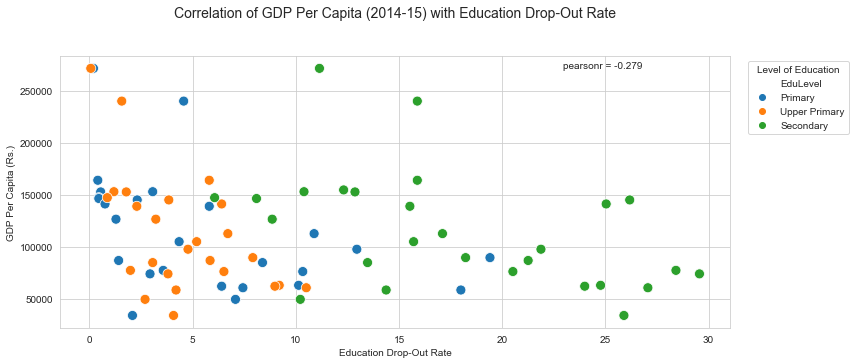

In [45]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x=df_GDP_DropOut['DropOut'], y=df_GDP_DropOut['2014-15'],hue=df_GDP_DropOut['EduLevel'], s=100)
pearsonr_val = "pearsonr = " + str(np.round(df_GDP_DropOut.corr(method ='pearson').iloc[1,0],3))
ax.text(0.75, 0.98, pearsonr_val, ha="left", va="top", transform=ax.transAxes)
plt.title("Correlation of GDP Per Capita (2014-15) with Education Drop-Out Rate", size=14, y=1.12)
plt.xlabel("Education Drop-Out Rate")
plt.ylabel("GDP Per Capita (Rs.)")
plt.legend(title="Level of Education", bbox_to_anchor=(1.02, 1), loc=2)
plt.plot()

<b><u>Key Insights</u> after correlating GDP Per Capita with Overall Drop-Out Rate </b>
1. Correlation Coefficient = -0.279 indicates <b>Negative Association
2. Interesting observation is that the <b><i><u>Secondary</u></i> Level of Education seems to have the highest Drop-Out Rate. And the corresponding states have a low GDP Per Capita.</b>
3. <b>States having highest Per Capita GDP's are the ones having the Education Drop-Out Rate under 16.</b>
4. Density of GDP Per Capita and Education Drop-Out Rate is greater where the value of GDP Per Capita is low, having low Education Drop-Out Rate.

Next regression plot for each Level of Education to analyze 1 step deeper in a lucid way.

<a id="Part2-A2"></a>

##### 3.3.1.2 Analysis 2: Plot & Correlate GDP Per Capita with Each Level of Education Drop-Out Rate

C:\ds\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


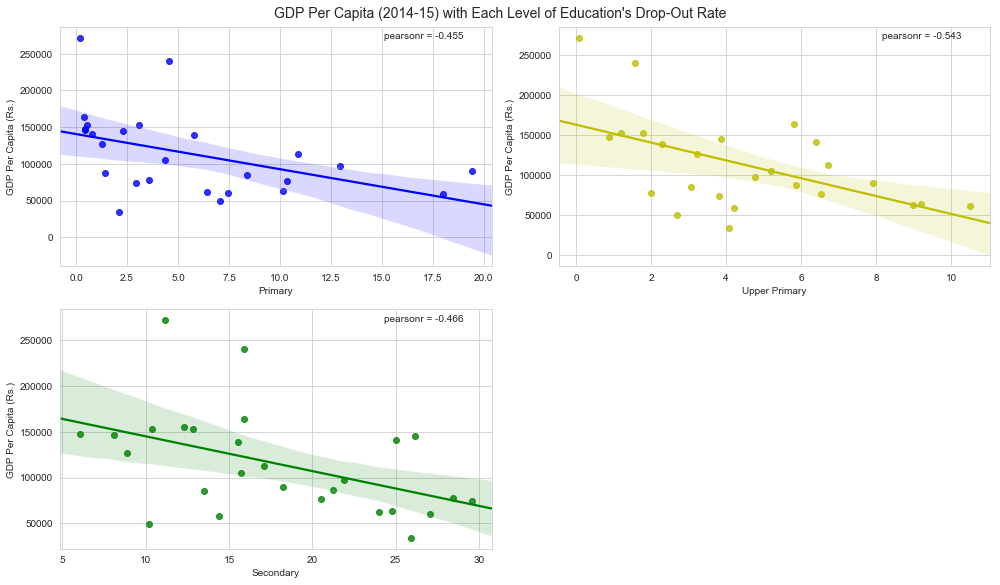

In [46]:
# Plotting details 
fig = plt.figure(figsize=(14,8))
plt.suptitle("GDP Per Capita (2014-15) with Each Level of Education's Drop-Out Rate", size=14,y=1.01)

ax1 = fig.add_subplot(221)
sns.regplot(x=df_State_DropOut_PerCapita['Primary'], y=df_State_DropOut_PerCapita['2014-15'], color='b')
pearsonr_val = "pearsonr = " + str(np.round(df_State_DropOut_PerCapita.loc[:,['2014-15','Primary']].corr(method ='pearson').iloc[1,0],3))
ax1.text(0.75, 0.98, pearsonr_val, ha="left", va="top", transform=ax1.transAxes)
plt.ylabel("GDP Per Capita (Rs.)") 

ax2 = fig.add_subplot(222)
sns.regplot(x=df_State_DropOut_PerCapita['Upper Primary'], y=df_State_DropOut_PerCapita['2014-15'], ax=ax2, color='y')
pearsonr_val = "pearsonr = " + str(np.round(df_State_DropOut_PerCapita.loc[:,['2014-15','Upper Primary']].corr(method ='pearson').iloc[1,0],3))
ax2.text(0.75, 0.98, pearsonr_val, ha="left", va="top", transform=ax2.transAxes)
plt.ylabel("GDP Per Capita (Rs.)")

ax3 = fig.add_subplot(223)
sns.regplot(x=df_State_DropOut_PerCapita['Secondary'], y=df_State_DropOut_PerCapita['2014-15'], ax=ax3, color='g')
pearsonr_val = "pearsonr = " + str(np.round(df_State_DropOut_PerCapita.loc[:,['2014-15','Secondary']].corr(method ='pearson').iloc[1,0],3))
ax3.text(0.75, 0.98, pearsonr_val, ha="left", va="top", transform=ax3.transAxes)
plt.ylabel("GDP Per Capita (Rs.)")

plt.tight_layout()
plt.show()

<b><u>Key Insights</u> after correlating GDP Per Capita with Each Level of Education's Drop-Out Rate </b>
1. Regression for Primary, Upper Primary and Secondary demonstrate that <b>Higher Education Drop-Out Rate resulted in Lower GDP Per Capita - NEGATIVE ASSOCIATION</b><br/><br/>
<u>Correlation Coefficients:</u><br/>
GDP Per Capita with Primary = -0.455<br/>
GDP Per Capita with Upper Primary = -0.543<br/>
GDP Per Capita with Secondary = -0.466<br/><br/>

Next, Correlating the Drop-Out Rate with the Categories and State

<a id="Part2-A3"></a>

##### 3.3.1.3 Analysis 3: Plot & Correlate Category (C1, C2, C3, C3) with Overall and Each Level of Education Drop-Out Rate<br/>

In [47]:
#Merge GSVA PerCapita dataframe with Drop Out dataframe based on States
df_Category_DropOut = df_GDP_PerCapita.merge(df_DropOut,how='inner',on='State')

#C1, C2, C3 and C4 are already categorized based on GDP Per Capita. Removing non-required columns.
df_Category_DropOut.drop(['2014-15','State'],axis=1,inplace=True)
df_Category_DropOut = pd.melt(df_Category_DropOut, id_vars="Category", var_name="EduLevel", value_name="Value")
df_Category_DropOut_Plot = df_Category_DropOut
#Using group by in order to maintain the order of States - descending order based on GDP Per Capita
df_Category_DropOut = df_Category_DropOut.groupby(['Category', 'EduLevel'], sort=False)['Value'].mean().unstack('EduLevel')

#Restoring null values instead of 0. Null values in heat map are fine to ignore.
df_Category_DropOut = df_Category_DropOut.replace(0, np.nan)

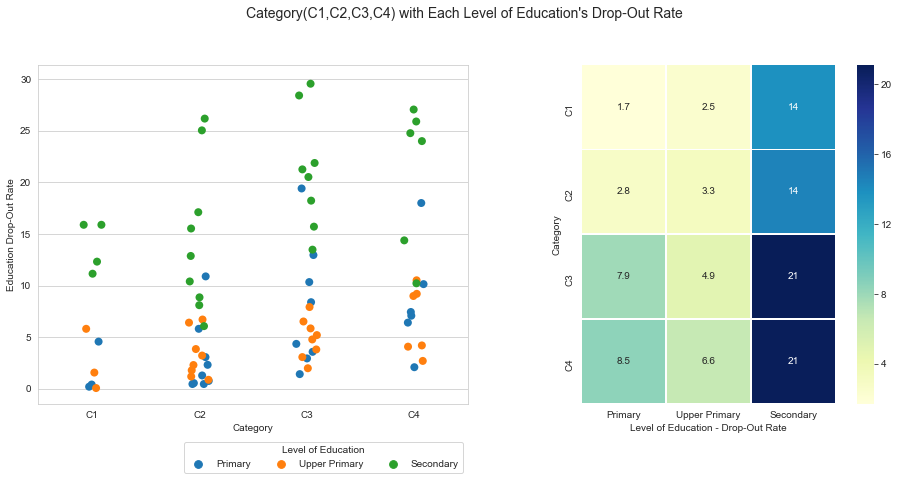

In [48]:
fig = plt.figure(figsize=(13,6))
plt.suptitle("Category(C1,C2,C3,C4) with Each Level of Education's Drop-Out Rate", size=14,y=1.1)

ax1 = fig.add_subplot(121)
sns.stripplot(x="Category", y="Value", data=df_Category_DropOut_Plot, hue="EduLevel", ax=ax1, s=8)
ax1.set_xlabel("Category")
ax1.set_ylabel("Education Drop-Out Rate")
ax1.legend(title="Level of Education", bbox_to_anchor=(0., -.20, 1., .102), ncol=5, loc=1)

ax2 = fig.add_subplot(122)
sns.heatmap(df_Category_DropOut, annot=True,linewidths=.5, square=True,cmap="YlGnBu",ax=ax2)
ax2.set_xlabel("Level of Education - Drop-Out Rate")

plt.tight_layout()
plt.show()

<b><u>Key Insights</u> after correlating Category (C1, C2, C3, C4) with Each Level of Education's Drop-Out Rate </b>
1. <b>Highest Per Capita GDP Category, C1 has the lowest Education Drop-Out Rate - NEGATIVE ASSOCIATION</b>
2. C2, C3 and C4 have higher Education Drop-Out Rate
3. <b>Secondary Level of Education has highest Drop-Out Rate</b>
4. <b>Categories C3 and C4 have the highest Drop-Out Rate and Lowest GDP Per Capita</b>
5. The higher drop out rate for Secondary Level of Education has had an adverse effect on the GDP Per Capita of C3 and C4.
6. <b>Lower Drop out rate in Primary and Upper Primary level also ensures that the drop out rate at Secondary level gets lowered.</b>

Recommendation: Focus on ensuring children don't drop out at the Secondary Level will ensure that the GDP of our country grows.

Next, Correlating the Drop-Out Rate with each State

<a id="Part2-A4"></a>

##### 3.3.1.4 Analysis 4: Plot & Correlate States with Each Level of Education Drop-Out Rate<br/>

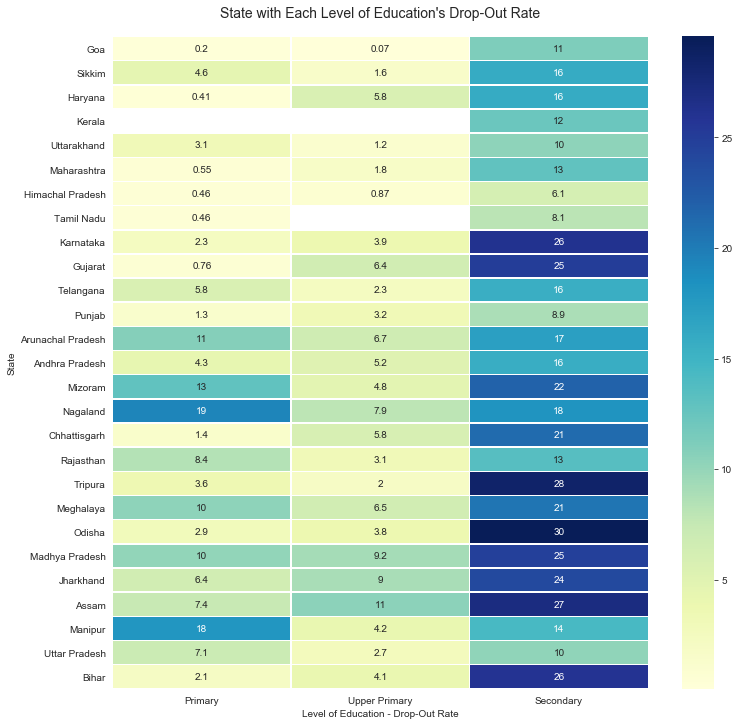

In [49]:
#Merge GSVA PerCapita dataframe with Drop Out dataframe based on States
df_State_DropOut = df_GDP_PerCapita.merge(df_DropOut,how='inner',on='State')
df_State_DropOut.drop(['2014-15','Category'],axis=1,inplace=True)

df_State_DropOut = pd.melt(df_State_DropOut, id_vars="State", var_name="EduLevel", value_name="Value")

#Using group by in order to maintain the order of States - descending order based on GDP Per Capita
df_State_DropOut = df_State_DropOut.groupby(['State', 'EduLevel'], sort=False)['Value'].sum().unstack('EduLevel')

#Restoring null values instead of 0. Null values in heat map are fine to ignore.
df_State_DropOut = df_State_DropOut.replace(0, np.nan)

plt.figure(figsize=(12, 12))
plt.title("State with Each Level of Education's Drop-Out Rate", size=14,y=1.02)
sns.heatmap(df_State_DropOut, annot=True,linewidths=.5,cmap="YlGnBu")
plt.xlabel("Level of Education - Drop-Out Rate")
plt.show()

#The NaN values are left as is in the Heat Map as they are blanked out in it.
#The rows for the States not deleted as data for even a single Level of Education helps in analysis.

<b><u>Key Insights</u> after correlating States with Each Level of Education's Drop-Out Rate </b>
1. Secondary Level of Education has the highest Drop-Out Rate across States. 
2. <b>The Lower the Secondary level of Education Drop-Out Rate the Higher the GDP Per Capita for a State - NEGATIVE ASSOCIATION</b><br/>
 <b>Odisha, Tripura and Assam</b> have higher Secondary Level of Education Drop-Out Rate and impacting their GDP Per Capita
3. Primary and Upper Primary Drop-Out Rate is lower for States having Higher GDP Per Capita. 
 <b> Manipur </b> had high Primary Drop-Out Rate. It seems to lead to lower GDP Per Capita
 <b> Goa, Haryana, Maharashtra, Himachal Pradesh and Tamil Nadu</b> had Primary Drop-Out Rate under 1, helping them perform high on GDP Per Capita.

<a id="Part2-Hypothesis"></a>

### 3.3.2 Hypothesis
<i><b>Note:</b> Key Insights have been written at the end of the above 4 Analysis</i>

##### Hypothesis #1
> <b>IF</b> the Drop-Out Rate at Secondary Education Level is reduced / controlled <b>THEN</b> it will increase State's GDP Per Capita

##### Hypothesis #2
> <b>IF</b> the Drop-Out Rate at Primary Education Level reduced / controlled <b>THEN</b> it will reduce the Drop-Out Rate at Upper Primary Level and THEN eventually reduce at Secondary Education Level